In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import ipywidgets as widgets
from IPython.display import display
from matplotlib import patheffects
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [2]:
%%html 
<style> 
.widget-readout{ color:white; font-size: 20px; } 
.jupyter-widgets {color: white; }
.widget-label {
 color: white;#cccccc !important;
 font-size: 22px;
}
</style>

In [3]:
def f(x):
    return np.exp(x) - x - 1 

def fl(x): 
    return np.exp(x) - 1 

In [4]:
# import matplotlib.font_manager
# from IPython.core.display import HTML

# def make_html(fontname):
#     return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

# code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

# HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [5]:
plt.style.use('dark_background')
# plt.rcParams['font.family'] = ['Letters for Learners']
plt.rc('font', size=20) 



interactive(children=(IntSlider(value=0, description='it', max=12), FloatSlider(value=0.9, description='$x_0$'…

findfont: Font family ['Letters for Learners'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Letters for Learners'] not found. Falling back to DejaVu Sans.


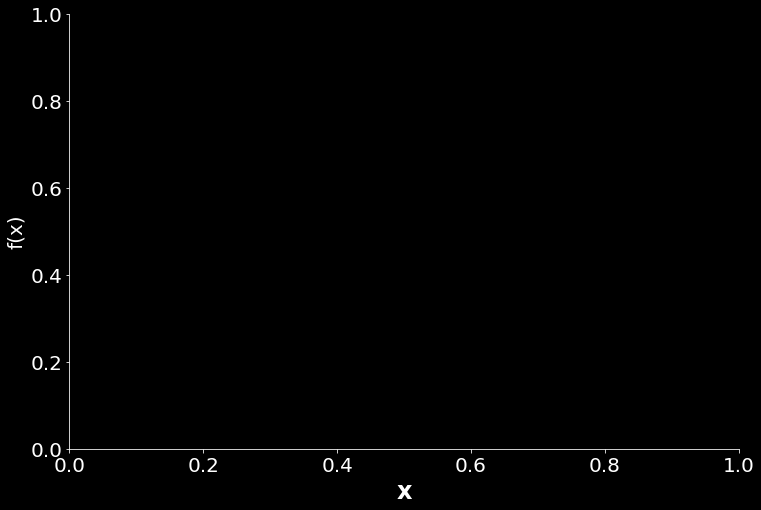

In [6]:
def nr(it=0, x0=0.5):
    fig,ax = plt.subplots(1, figsize=(12,8), facecolor='#000000')

    ax.spines['bottom'].set_color('white')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.spines['left'].set_color('white')
    ax.set_ylabel('f(x)')
    ax.set_xlabel("x", fontweight ='bold', fontsize=24)
    ax.set_ylabel("f(x)", fontweight ='bold', fontsize=24, rotation=0)
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])

    xmin = -1
    xmax = 1 
    xp = np.arange(xmin, xmax, 0.01)
    yp = f(xp)
    y0 = 0
    ax.plot(xp,yp, lw=3, color='cyan');
    ax.plot(x0,f(x0),'yo', markersize=20)
    ax.vlines(x0, y0, f(x0), color = 'orange', ls = 'dashed')
    ax.spines['bottom'].set_position('zero')

    tx1 = ax.text(0.6, 0.95, f'f({x0:.4})={f(x0):.4}', va = 'top', ha ='left', fontsize=40, transform=ax.transAxes)
    ymin, ymax = ax.get_ylim()
    ax.text(0.1,0.95, r'$e^x -x -1 $', va = 'top', ha ='left', fontsize=40, transform=ax.transAxes)
    for i in range(it): 
#        ax.set_xlim(auto=True)
#        ax.set_ylim(min(yp), max(yp))
#        ax.set_ylim(auto=True)
#         ax.clear()
        y = f(x0)
        x = x0 - f(x0)/fl(x0)
        dx= abs(x0 - x)/4
        ax.plot([x,x0],[0,y],lw=1, color='lime')
        xp = np.arange(xmin, xmax, abs(xmax-xmin)/100)
        yp = f(xp)
        ax.plot(xp,yp, lw=3, color='cyan'); 
        ax.vlines(x, ymin, ymax, color = 'orange', ls = 'dashed')
        ax.plot(x,f(x),'yo', markersize=20)
        xmin = min([x,x0])
        xmax = max([x,x0])
#        ax.spines['left'].set_position(('data', 1-dx))    
#         tx0.set_position([x,0])
#         tx0.set_text( f'{x:.4}')
        tx1.set_text( f'f({x:.4})={f(x):.4}')
        x0 = x

xo_r = widgets.FloatSlider(min=-4, max=4, step=0.05, value=0.9, layout=widgets.Layout(width='600px'), description = r'$x_0$') 
widgets.interact(nr, it=(0,12), x0=xo_r);       